In [16]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

In [41]:
df = pd.read_csv('Data.csv')

/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_58066/2170550165.py:1: DtypeWarning: Columns (3186,3188,3190,3191,3201,3337,3339,3340,3341,3342,3352,3363,3419,3422) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data.csv')


In [42]:
df['ID'] = range(1, len(df) + 1)
df = df[['ID','Asteroid1.12','Asteroid2.12','Asteroid3.12','Asteroid4.12','Asteroid5.12','Treatment1.12','Treatment2.12','Treatment3.12','Treatment4.12','Treatment5.12',
           'UncontrollableRisk1.18','UncontrollableRisk2.18','UncontrollableRisk3.18', 'EffortSurvival.18','ImportantSurvive.18', 'Wealth.12',"SSES.12",'Age.1','Education.1', 
           'CFC.Future.9','CFC.Immediate.9','SoPA.9','SoNA.9','LifeOrientation.10','Sex.1']]

df.to_csv('Data.csv', index=False)

In [19]:
# Look at when people gave up across all four scenarios.

df_b = df[['ID','Asteroid1.12','Asteroid2.12','Asteroid3.12','Asteroid4.12','Asteroid5.12',
           'Treatment1.12','Treatment2.12','Treatment3.12','Treatment4.12','Treatment5.12']].dropna()
gave_up_a, gave_up_self = [], []
for p in range(len(df_b.index)):
    df_a_1 = df_b.iloc[p,1:6][::-1]
    initial = df_a_1[0]
    if initial == 1:
        gave_up = 0
    else:
        for i in range(len(df_a_1)-1):
            if df_a_1[i+1] == 1:
                gave_up = i+1
                break
            else:
                gave_up = 5
    gave_up_a.append(gave_up)

for p in range(len(df_b.index)):
    df_a_1 = df_b.iloc[p,6:][::-1]
    initial = df_a_1[0]
    if initial == 1:
        gave_up = 0
    else:
        for i in range(len(df_a_1)-1):
            if df_a_1[i+1] == 1:
                gave_up = i+1
                break
            else:
                gave_up = 5
    gave_up_self.append(gave_up)

# These need to be reversed
gave_up_self = [5 - i for i in gave_up_self]
gave_up_a = [5 - i for i in gave_up_a]
df_c = pd.DataFrame({'ID':df_b['ID'],'Asteroid':gave_up_a,'Disease':gave_up_self})
print(stats.pearsonr(gave_up_a,gave_up_self))
print(stats.kendalltau(gave_up_a,gave_up_self))


df_b = df[['ID','Asteroid5.12','Asteroid4.12','Asteroid3.12','Asteroid2.12','Asteroid1.12',
           'Treatment5.12','Treatment4.12','Treatment3.12','Treatment2.12','Treatment1.12']].dropna()

n_1s_a, ci_a = [], []
for c in df_b.iloc[:,1:6][::-1].columns:
    p = df_b[c].loc[df_b[c] == 1].count() / df_b[c].count()
    n_1s_a.append(p)
    ci_a.append(1.96 * np.sqrt(p*(1-p) / df_b[c].count()))

n_1s_d, ci_d = [],[]
for c in df_b.iloc[:,6:][::-1].columns:
    p = df_b[c].loc[df_b[c] == 1].count() / df_b[c].count()
    n_1s_d.append(p)
    ci_d.append(1.96 * np.sqrt(p*(1-p) / df_b[c].count()))

print(stats.wilcoxon(df_b['Asteroid5.12'],df_b['Treatment5.12']))
print(stats.wilcoxon(df_b['Asteroid4.12'],df_b['Treatment4.12']))
print(stats.wilcoxon(df_b['Asteroid3.12'],df_b['Treatment3.12']))
print(stats.wilcoxon(df_b['Asteroid2.12'],df_b['Treatment2.12']))
print(stats.wilcoxon(df_b['Asteroid1.12'],df_b['Treatment1.12']))

print(stats.ttest_rel(df_b['Asteroid5.12'],df_b['Treatment5.12']))
print(stats.ttest_rel(df_b['Asteroid4.12'],df_b['Treatment4.12']))
print(stats.ttest_rel(df_b['Asteroid3.12'],df_b['Treatment3.12']))
print(stats.ttest_rel(df_b['Asteroid2.12'],df_b['Treatment2.12']))
print(stats.ttest_rel(df_b['Asteroid1.12'],df_b['Treatment1.12']))



PearsonRResult(statistic=0.4623180475314762, pvalue=1.8041678102889821e-22)
KendalltauResult(correlation=0.431030151982902, pvalue=1.399000012605665e-25)
WilcoxonResult(statistic=877.0, pvalue=0.44366135195696255)
WilcoxonResult(statistic=3102.0, pvalue=0.13002093428414782)
WilcoxonResult(statistic=3232.5, pvalue=7.590504364301153e-05)
WilcoxonResult(statistic=4169.5, pvalue=1.7960556375379935e-05)
WilcoxonResult(statistic=2685.0, pvalue=6.4141076265802435e-06)
Ttest_relResult(statistic=0.7679537212573601, pvalue=0.4429712083206697)
Ttest_relResult(statistic=1.4813658797788363, pvalue=0.13930233549223484)
Ttest_relResult(statistic=4.037200494306592, pvalue=6.49260599877029e-05)
Ttest_relResult(statistic=4.3365035636898455, pvalue=1.837782528307993e-05)
Ttest_relResult(statistic=4.534691273631082, pvalue=7.649871855306293e-06)


In [20]:
# create a table for a xi-square test of independence, getting counts of 1, 2, 3 for Asteroid5.12 and Treatment5.12

for i in range(5):
    w = stats.chi2_contingency(pd.crosstab(df_b['Asteroid'+str(i+1)+'.12'], df_b['Treatment'+str(i+1)+'.12']))
    print(i,'Chi-square',w[0],' ; p = ', w[1])

from statsmodels.stats.proportion import proportions_ztest
for i in range(5):
    df_t = df[['Asteroid'+str(i+1)+'.12', 'Treatment'+str(i+1)+'.12']].dropna()
    
    n_give_up_a = df_t.loc[df_t['Asteroid'+str(i+1)+'.12'] == 1].shape[0]
    n_give_up_b = df_t.loc[df_t['Treatment'+str(i+1)+'.12'] == 1].shape[0]

    count_a = df_t.shape[0]
    count_b = df_t.shape[0]

    z = proportions_ztest([n_give_up_a, n_give_up_b], [count_a, count_b])

    print(i, 'Asteroid', n_give_up_a, 'Treatment', n_give_up_b, 'Total', count_a, 'Z',z[0], 'p', z[1])




0 Chi-square 93.69820567459757  ; p =  2.1555939443942294e-19
1 Chi-square 123.21648844435957  ; p =  1.097769143265342e-25
2 Chi-square 174.4168193532377  ; p =  1.1786338074708573e-36
3 Chi-square 104.73158853782206  ; p =  9.662455040535394e-22
4 Chi-square 147.3689516693631  ; p =  7.455367915615671e-31
0 Asteroid 233 Treatment 270 Total 400 Z -2.707599968523212 p 0.006777165647437755
1 Asteroid 159 Treatment 190 Total 399 Z -2.2122146066555177 p 0.026951840064668966
2 Asteroid 70 Treatment 91 Total 402 Z -1.850669615087247 p 0.06421709789813557
3 Asteroid 31 Treatment 34 Total 402 Z -0.3881238954483045 p 0.6979243493484202
4 Asteroid 14 Treatment 15 Total 404 Z -0.18912021485866154 p 0.8499985982087558


/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_58066/1065961927.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(['','10%', '34%', '67%', '90%', '99%'])


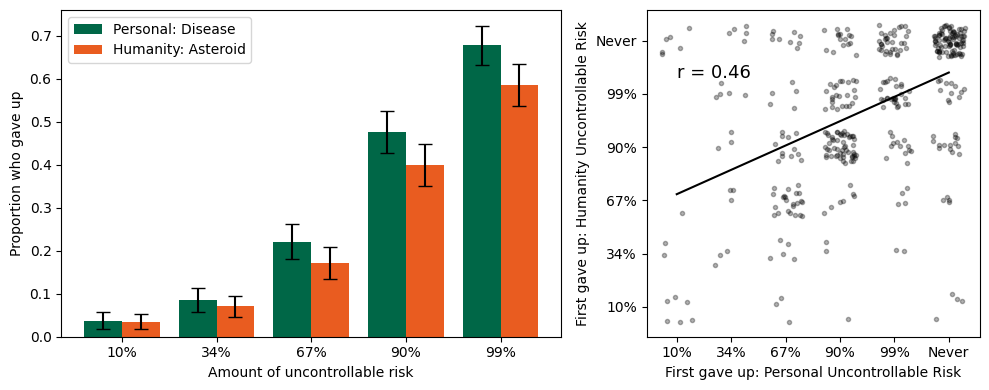

In [21]:
fig, axs = fig, axs = plt.subplots(1,2,figsize=(10,4), gridspec_kw={'width_ratios':[1.5,1]})

# 2023-08-09 I reverse ordered all axis
axs[0].bar([i-.2 for i in range(5)], n_1s_d, yerr = ci_d, width = .4, color='#006747FF', capsize=5, label='Personal: Disease')
axs[0].bar([i+.2 for i in range(5)], n_1s_a, yerr = ci_a, width = .4, color='#E95C20FF', capsize=5, label = 'Humanity: Asteroid')
axs[0].set_xticklabels(['','10%', '34%', '67%', '90%', '99%'])
axs[0].legend()
axs[0].set_ylabel('Proportion who gave up')
axs[0].set_xlabel('Amount of uncontrollable risk')
axs[1].scatter([5 - i + random.uniform(-.3,.3) for i in gave_up_self],[5 - i + random.uniform(-.3,.3) for i in gave_up_a], color='black', alpha=.3, label='Personal: Disease', marker='.')

# Add a best fit line
X = sm.add_constant([5 - i for i in gave_up_self])
model = sm.OLS([5 - i for i in gave_up_a],X)
results = model.fit()
x = np.linspace(0,5,100)
axs[1].plot(x,results.params[0] + results.params[1]*x, color='black')


axs[1].set_xlabel('First gave up: Personal Uncontrollable Risk')
axs[1].set_ylabel('First gave up: Humanity Uncontrollable Risk')
axs[1].set_xticks([0,1,2,3,4,5])
axs[1].set_xticklabels(['10%', '34%', '67%', '90%', '99%','Never'])
axs[1].set_yticks([0,1,2,3,4,5])
axs[1].set_yticklabels(['10%', '34%', '67%', '90%', '99%','Never'])
axs[1].text(0,4.3,'r = ' + str(round(results.rsquared**.5,2)),fontsize=13)
plt.tight_layout()
plt.show()



In [22]:
never = 0
l = 4
for i in gave_up_a:
    if i == l:
        never += 1
print(never / len(gave_up_a))

never = 0
for i in gave_up_self:
    if i == l:
        never += 1
print(never / len(gave_up_self))

never = 0
for i in range(len(gave_up_a)):
    if gave_up_a[i] == l and gave_up_self[i] == l:
        never += 1
print(never / len(gave_up_a))

0.035175879396984924
0.04773869346733668
0.007537688442211055


In [24]:
var = 'UncontrollableRisk3.18'
df[var]=pd.to_numeric(df[var])
print('Current behavior continued:',df[var].count(),round(df[var].mean(),2),round(df[var].std(),2))
      
var = 'UncontrollableRisk1.18'
df[var]=pd.to_numeric(df[var])
df['Unc_ex_risk'] = 100 - df[var]
print('Uncontrollable ex risk:',df['Unc_ex_risk'].count(),round(df['Unc_ex_risk'].mean(),2),round(df['Unc_ex_risk'].std(),2))

var = 'UncontrollableRisk2.18'
df[var]=pd.to_numeric(df[var])
df['Contr_ex_risk'] = 100 - df[var]
print('Controllable ex risk:',df['Contr_ex_risk'].count(),round(df['Contr_ex_risk'].mean(),2),round(df['Contr_ex_risk'].std(),2))




Current behavior continued: 341 38.72 31.14
Uncontrollable ex risk: 343 19.7 24.03
Controllable ex risk: 340 41.61 31.48


In [25]:
df_t = df[['ID','Unc_ex_risk','Contr_ex_risk']].dropna()
print(stats.spearmanr(df_t['Unc_ex_risk'],df_t['Contr_ex_risk']))

df_t = df[['ID', 'Unc_ex_risk','UncontrollableRisk3.18']].dropna()
print(stats.spearmanr(df_t['Unc_ex_risk'],df_t['UncontrollableRisk3.18']))

df_t = df[['ID', 'Contr_ex_risk','UncontrollableRisk3.18']].dropna()
print(stats.spearmanr(df_t['Contr_ex_risk'],df_t['UncontrollableRisk3.18']))

df_t = df[['ID', 'Unc_ex_risk','EffortSurvival.18']].dropna()
print(stats.spearmanr(df_t['Unc_ex_risk'],df_t['EffortSurvival.18']))

df_t = df[['ID', 'Contr_ex_risk','EffortSurvival.18']].dropna()
print(stats.spearmanr(df_t['Contr_ex_risk'],df_t['EffortSurvival.18']))

SpearmanrResult(correlation=0.5794526602249834, pvalue=6.982086969476252e-32)
SpearmanrResult(correlation=0.38884071548990207, pvalue=9.389257606599272e-14)
SpearmanrResult(correlation=0.5299290146673066, pvalue=7.231574057225541e-26)
SpearmanrResult(correlation=-0.039016427672889174, pvalue=0.4726879078123202)
SpearmanrResult(correlation=0.16424388639498258, pvalue=0.0024536733309758136)


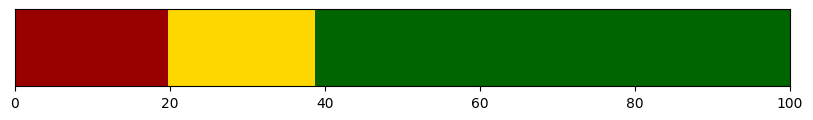

In [26]:
plt.rcParams["figure.figsize"] = [10, 1]

x = ['Risk']

a = [round(df['Unc_ex_risk'].mean(),2)]
b = [round(df['UncontrollableRisk3.18'].mean(),2) - round(df['Unc_ex_risk'].mean(),2)]
c = [round(df['Contr_ex_risk'].mean(),2) - round(df['UncontrollableRisk3.18'].mean(),2)]
d = [100 - round(df['Contr_ex_risk'].mean(),2)]
plt.barh(x, a, color="#990000")
plt.barh(x, b,left=a, color='#FFD700')
plt.barh(x, c,left=[a[0] + b[0]], color="#006400") # Can change this to yellow if you want to see amount given we did nothing at all
plt.barh(x, d,left=[a[0] + b[0] + c[0]], color="#006400")

plt.xlim(0,100)
plt.ylim(-.4,.4)

plt.yticks([])
plt.show()


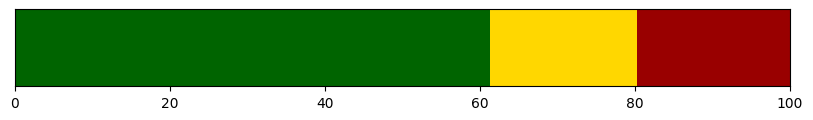

In [27]:
plt.rcParams["figure.figsize"] = [10, 1]

x = ['Risk']

a = [100 - round(df['Contr_ex_risk'].mean(),2)]
b = [round(df['Contr_ex_risk'].mean(),2) - round(df['UncontrollableRisk3.18'].mean(),2)]
c = [round(df['UncontrollableRisk3.18'].mean(),2) - round(df['Unc_ex_risk'].mean(),2)]
d = [round(df['Unc_ex_risk'].mean(),2)]

plt.barh(x, a, color="#006400")
plt.barh(x, b,left=a, color='#006400')
plt.barh(x, c,left=[a[0] + b[0]], color="#FFD700") # Can change this to yellow if you want to see amount given we did nothing at all
plt.barh(x, d,left=[a[0] + b[0] + c[0]], color="#990000")

plt.xlim(0,100)
plt.ylim(-.4,.4)

plt.yticks([])
#plt.gca().invert_xaxis()
plt.show()

In [28]:
df_temp = df[['EffortSurvival.18']]
df_temp['EffortSurvival.18']= pd.to_numeric(df_temp['EffortSurvival.18'])
print(df_temp['EffortSurvival.18'].mean(),df_temp['EffortSurvival.18'].std())

# Modify some variables and make composites of others
def fix_import(x):
    if x == 1:
        return x
    else:
        return x - 4
df['ImportantSurvive.18'] = df['ImportantSurvive.18'].apply(lambda x: fix_import(x))
print(df['ImportantSurvive.18'].mean(),df['ImportantSurvive.18'].std())


48.08797653958944 30.950879522987815
5.4854651162790695 1.7479078085626807


/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_58066/4049484267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['EffortSurvival.18']= pd.to_numeric(df_temp['EffortSurvival.18'])


In [29]:

df_temp = df[['EffortSurvival.18','ImportantSurvive.18']].dropna()
df_temp['EffortSurvival.18']= pd.to_numeric(df_temp['EffortSurvival.18'])
df_temp['ImportantSurvive.18']= pd.to_numeric(df_temp['ImportantSurvive.18'])
print(stats.spearmanr(df_temp['EffortSurvival.18'],df_temp['ImportantSurvive.18']))

df_temp = df[['EffortSurvival.18','ImportantSurvive.18']].dropna()
df_temp['EffortSurvival.18']= pd.to_numeric(df_temp['EffortSurvival.18'])
df_temp['ImportantSurvive.18']= pd.to_numeric(df_temp['ImportantSurvive.18'])
print(stats.spearmanr(df_temp['EffortSurvival.18'],df_temp['ImportantSurvive.18']))

vars_1 = ['ImportantSurvive.18','Unc_ex_risk','UncontrollableRisk3.18','EffortSurvival.18']
df_temp = df[vars_1]
for v_1 in vars_1:
    df_temp[v_1] = pd.to_numeric(df_temp[v_1])
df_temp = df_temp.dropna()
X = df_temp[['Unc_ex_risk','UncontrollableRisk3.18','ImportantSurvive.18']] 
y = df_temp['EffortSurvival.18'] 
X = sm.add_constant(X) 
est_3 = sm.OLS(y, X).fit() 
#print(est_3.summary())

print('Normalized result')
for v_1 in vars_1:
    df_temp[v_1] = preprocessing.normalize([df_temp[v_1]])[0]
X = df_temp[['Unc_ex_risk','UncontrollableRisk3.18','ImportantSurvive.18']] 
y = df_temp['EffortSurvival.18'] 
X = sm.add_constant(X) 
est_2n = sm.OLS(y, X).fit() 
print(est_2n.summary())

SpearmanrResult(correlation=0.4566277910865267, pvalue=5.739173474166684e-19)
SpearmanrResult(correlation=0.4566277910865267, pvalue=5.739173474166684e-19)
Normalized result
                            OLS Regression Results                            
Dep. Variable:      EffortSurvival.18   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     41.20
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.05e-22
Time:                        13:58:05   Log-Likelihood:                 773.45
No. Observations:                 341   AIC:                            -1539.
Df Residuals:                     337   BIC:                            -1524.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef   

/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_58066/1469716428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[v_1] = pd.to_numeric(df_temp[v_1])


In [30]:

print('Effort Survival')
vars_1 = ['EffortSurvival.18','Unc_ex_risk','UncontrollableRisk3.18']
df_temp = df[vars_1]
for v_1 in vars_1:
    df_temp[v_1] = pd.to_numeric(df_temp[v_1])
df_temp = df_temp.dropna()
X = df_temp[['Unc_ex_risk','UncontrollableRisk3.18']] 
y = df_temp['EffortSurvival.18'] 
X = sm.add_constant(X) 
est_1 = sm.OLS(y, X).fit() 
print(est_1.summary())


# Now normalize
print('Normalized result')
for v_1 in vars_1:
    df_temp[v_1] = preprocessing.normalize([df_temp[v_1]])[0]
X = df_temp[['Unc_ex_risk','UncontrollableRisk3.18']] 
y = df_temp['EffortSurvival.18'] 
X = sm.add_constant(X) 
est_1n = sm.OLS(y, X).fit() 
print(est_1n.summary())


print('\n\nImportant Survival')
vars_1 = ['ImportantSurvive.18','Unc_ex_risk','UncontrollableRisk3.18']
df_temp = df[vars_1]
for v_1 in vars_1:
    df_temp[v_1] = pd.to_numeric(df_temp[v_1])
df_temp = df_temp.dropna()
X = df_temp[['Unc_ex_risk','UncontrollableRisk3.18']] 
y = df_temp['ImportantSurvive.18'] 
X = sm.add_constant(X) 
est_2 = sm.OLS(y, X).fit() 
print(est_2.summary())

print('Normalized result')
for v_1 in vars_1:
    df_temp[v_1] = preprocessing.normalize([df_temp[v_1]])[0]
X = df_temp[['Unc_ex_risk','UncontrollableRisk3.18']] 
y = df_temp['ImportantSurvive.18'] 
X = sm.add_constant(X) 
est_2n = sm.OLS(y, X).fit() 
print(est_2n.summary())

Effort Survival
                            OLS Regression Results                            
Dep. Variable:      EffortSurvival.18   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     8.286
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           0.000307
Time:                        13:58:23   Log-Likelihood:                -1645.6
No. Observations:                 341   AIC:                             3297.
Df Residuals:                     338   BIC:                             3309.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const       

/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_58066/1959720908.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[v_1] = pd.to_numeric(df_temp[v_1])
/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_58066/1959720908.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[v_1] = pd.to_numeric(df_temp[v_1])


In [31]:
print('Effort Survival')
vars_1 = ['EffortSurvival.18','Unc_ex_risk','UncontrollableRisk3.18']
df_temp = df[vars_1]
for v_1 in vars_1:
    df_temp[v_1] = pd.to_numeric(df_temp[v_1])
df_temp = df_temp.dropna()


# Now normalize
print('Normalized result')
for v_1 in vars_1:
    df_temp[v_1] = preprocessing.normalize([df_temp[v_1]])[0]
X = df_temp[['Unc_ex_risk','UncontrollableRisk3.18']] 
y = df_temp['EffortSurvival.18'] 
X = sm.add_constant(X) 
est_1n = sm.OLS(y, X).fit() 
print(est_1n.summary())

Effort Survival
Normalized result
                            OLS Regression Results                            
Dep. Variable:      EffortSurvival.18   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     8.286
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           0.000307
Time:                        13:58:26   Log-Likelihood:                 728.34
No. Observations:                 341   AIC:                            -1451.
Df Residuals:                     338   BIC:                            -1439.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_58066/1176837213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[v_1] = pd.to_numeric(df_temp[v_1])


In [32]:
uncon, tot,predict = [], [],[]
for i in range(100):
    for j in range(i+1):
        uncon.append(j)
        tot.append(i)
        predict.append(est_1.predict([[1,j,i]]))
df_simulate = pd.DataFrame({'Unc_ex_risk': uncon, 'UncontrollableRisk3.18': tot, 'Predict':predict})

In [33]:
uncon, tot = [],[]
for i in range(11):
    uncon.append([j for j in range(11)])
    tot.append([i for j in range(11)])

High, High: 48.74390243902439  N: 82
95% CI: 42.92214585728294 54.565659020765835
TTest Ttest_1sampResult(statistic=0.2208293570577174, pvalue=0.8257809986133129)
High, Low: 56.5609756097561  N: 82
95% CI: 49.93044517302624 63.191506046485955
TTest Ttest_1sampResult(statistic=2.504637952573394, pvalue=0.014263800913449911)
Low, High: 43.592592592592595  N: 81
95% CI: 36.71129916534911 50.47388601983608
TTest Ttest_1sampResult(statistic=-1.2804209890586389, pvalue=0.2040971760707743)
Low, Low: 43.70238095238095  N: 84
95% CI: 36.39818543505751 51.006576469704385
TTest Ttest_1sampResult(statistic=-1.1768260215025697, pvalue=0.24262888071200742)


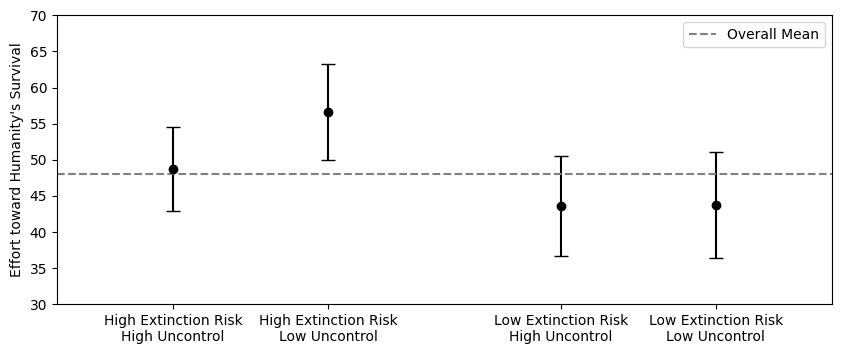

In [34]:
df_temp = df[['Unc_ex_risk','UncontrollableRisk3.18', 'EffortSurvival.18']].dropna()

fig, axs = plt.subplots(1, 1, figsize=(10, 3.75))

df_high_overall = df_temp.loc[df_temp['UncontrollableRisk3.18'] > df_temp['UncontrollableRisk3.18'].quantile(.5)]
df_high_high = df_high_overall.loc[df_high_overall['Unc_ex_risk'] > df_high_overall['Unc_ex_risk'].quantile(.5)]
print('High, High:',df_high_high['EffortSurvival.18'].mean(),' N:',len(df_high_high['EffortSurvival.18']))
se = df_high_high['EffortSurvival.18'].std()/np.sqrt(len(df_high_high['EffortSurvival.18']))
print('95% CI:',df_high_high['EffortSurvival.18'].mean()-1.96*se,df_high_high['EffortSurvival.18'].mean()+1.96*se)
print('TTest',stats.ttest_1samp(df_high_high['EffortSurvival.18'],df_temp['EffortSurvival.18'].mean()))
axs.errorbar([0.8],[df_high_high['EffortSurvival.18'].mean()], yerr=[se*1.96], color='black', marker='o', linestyle='none', capsize=5)



df_high_low = df_high_overall.loc[df_high_overall['Unc_ex_risk'] < df_high_overall['Unc_ex_risk'].quantile(.5)]
print('High, Low:',df_high_low['EffortSurvival.18'].mean(),' N:',len(df_high_low['EffortSurvival.18']))
se = df_high_low['EffortSurvival.18'].std()/np.sqrt(len(df_high_low['EffortSurvival.18']))
print('95% CI:',df_high_low['EffortSurvival.18'].mean()-1.96*se,df_high_low['EffortSurvival.18'].mean()+1.96*se)
print('TTest',stats.ttest_1samp(df_high_low['EffortSurvival.18'],df_temp['EffortSurvival.18'].mean()))
axs.errorbar([1.2],[df_high_low['EffortSurvival.18'].mean()], yerr=[se*1.96], color='black', marker='o', linestyle='none', capsize=5)


df_low_overall = df_temp.loc[df_temp['UncontrollableRisk3.18'] < df_temp['UncontrollableRisk3.18'].quantile(.5)]
df_low_high = df_low_overall.loc[df_low_overall['Unc_ex_risk'] > df_low_overall['Unc_ex_risk'].quantile(.5)]
print('Low, High:',df_low_high['EffortSurvival.18'].mean(),' N:',len(df_low_high['EffortSurvival.18']))
se = df_low_high['EffortSurvival.18'].std()/np.sqrt(len(df_low_high['EffortSurvival.18']))
print('95% CI:',df_low_high['EffortSurvival.18'].mean()-1.96*se,df_low_high['EffortSurvival.18'].mean()+1.96*se)
print('TTest',stats.ttest_1samp(df_low_high['EffortSurvival.18'],df_temp['EffortSurvival.18'].mean()))
axs.errorbar([1.8],[df_low_high['EffortSurvival.18'].mean()], yerr=[se*1.96], color='black', marker='o', linestyle='none', capsize=5)



df_low_low = df_low_overall.loc[df_low_overall['Unc_ex_risk'] < df_low_overall['Unc_ex_risk'].quantile(.5)]
print('Low, Low:',df_low_low['EffortSurvival.18'].mean(),' N:',len(df_low_low['EffortSurvival.18']))
se = df_low_low['EffortSurvival.18'].std()/np.sqrt(len(df_low_low['EffortSurvival.18']))
print('95% CI:',df_low_low['EffortSurvival.18'].mean()-1.96*se,df_low_low['EffortSurvival.18'].mean()+1.96*se)
print('TTest',stats.ttest_1samp(df_low_low['EffortSurvival.18'],df_temp['EffortSurvival.18'].mean()))
axs.errorbar([2.2],[df_low_low['EffortSurvival.18'].mean()], yerr=[se*1.96], color='black', marker='o', linestyle='none', capsize=5)


# Plot a dashed gray line at the mean of the overall Effort Survival
axs.axhline(y=df_temp['EffortSurvival.18'].mean(), color='gray', linestyle='--', label='Overall Mean')

axs.set_xticks([0.8,1.2,1.8,2.2])
axs.set_xticklabels(['High Extinction Risk\nHigh Uncontrol','High Extinction Risk\nLow Uncontrol','Low Extinction Risk\nHigh Uncontrol','Low Extinction Risk\nLow Uncontrol'])
axs.set_xlim([0.5,2.5])
axs.set_ylim([30,70])
axs.legend()
axs.set_ylabel("Effort toward Humanity's Survival")
plt.show()



In [35]:


df['Humanity_Effort'] = df['Contr_ex_risk'] - df['UncontrollableRisk3.18']
print(df['Humanity_Effort'].median(), df['Humanity_Effort'].std())
print(df['EffortSurvival.18'].median())

highs, lows = [],[]
highs.append(df.loc[(df['Humanity_Effort'] > df['Humanity_Effort'].median()) & (df['EffortSurvival.18'] > df['EffortSurvival.18'].median())].shape[0])
highs.append(df.loc[(df['Humanity_Effort'] > df['Humanity_Effort'].median()) & (df['EffortSurvival.18'] < df['EffortSurvival.18'].median())].shape[0])

lows.append(df.loc[(df['Humanity_Effort'] < df['Humanity_Effort'].median()) & (df['EffortSurvival.18'] > df['EffortSurvival.18'].median())].shape[0])
lows.append(df.loc[(df['Humanity_Effort'] < df['Humanity_Effort'].median()) & (df['EffortSurvival.18'] < df['EffortSurvival.18'].median())].shape[0])

table = pd.DataFrame([highs, lows], columns=['High Humanity', 'Low Humanity'], index=['High Personal Effort', 'Low Personal Effort'])
print(table)
stats.chi2_contingency(table)


0.0 31.61145482801531
51.0
                      High Humanity  Low Humanity
High Personal Effort             79            74
Low Personal Effort              62            55


(0.009672197581502898,
 0.9216564953449983,
 1,
 array([[79.9, 73.1],
        [61.1, 55.9]]))

In [39]:
vars_p, vars_o, cors, ps = [],[], [], []

for var_p in ['Wealth.12',"SSES.12",'Age.1','Education.1', 'CFC.Future.9','CFC.Immediate.9','SoPA.9','SoNA.9','LifeOrientation.10',]:
    for var_o in ['Disease','Asteroid']:
        df_t = df[['ID',var_p]].merge(df_c[['ID',var_o]], on='ID').dropna()
        print(var_p,var_o, stats.spearmanr(df_t[var_p],df_t[var_o]))
        vars_p.append(var_p)
        vars_o.append(var_o)
        cors.append(stats.spearmanr(df_t[var_p],df_t[var_o])[0])
        ps.append(stats.spearmanr(df_t[var_p],df_t[var_o])[1])
    for var_o in ['EffortSurvival.18','ImportantSurvive.18','Unc_ex_risk','UncontrollableRisk3.18']:
        df_t = df[[var_p,var_o]].dropna()
        print(var_p,var_o, stats.spearmanr(df_t[var_p],df_t[var_o]))
        vars_p.append(var_p)
        vars_o.append(var_o)
        cors.append(stats.spearmanr(df_t[var_p],df_t[var_o])[0])
        ps.append(stats.spearmanr(df_t[var_p],df_t[var_o])[1])
    
df_print = pd.DataFrame({'Predictor':vars_p,'Outcome':vars_o,'Correlation':cors, 'p':ps})
df_print


Wealth.12 Disease SpearmanrResult(correlation=0.012290148883678747, pvalue=0.8247795870404712)
Wealth.12 Asteroid SpearmanrResult(correlation=-0.025703210113529676, pvalue=0.6432988336309897)
Wealth.12 EffortSurvival.18 SpearmanrResult(correlation=0.19275575748248663, pvalue=0.0034063001643139046)
Wealth.12 ImportantSurvive.18 SpearmanrResult(correlation=0.09136899489015471, pvalue=0.1654182446697827)
Wealth.12 Unc_ex_risk SpearmanrResult(correlation=-0.0889441755320667, pvalue=0.17792466330321047)
Wealth.12 UncontrollableRisk3.18 SpearmanrResult(correlation=-0.02495861311574992, pvalue=0.707151796523507)
SSES.12 Disease SpearmanrResult(correlation=-0.11314604584038282, pvalue=0.024341522753029435)
SSES.12 Asteroid SpearmanrResult(correlation=-0.07924888237637018, pvalue=0.1153661689463491)
SSES.12 EffortSurvival.18 SpearmanrResult(correlation=0.24033463929036358, pvalue=6.220334593558687e-05)
SSES.12 ImportantSurvive.18 SpearmanrResult(correlation=0.1342236905579492, pvalue=0.02602821

,Predictor,Outcome,Correlation,p
0,Wealth.12,Disease,0.012290,0.824780
1,Wealth.12,Asteroid,-0.025703,0.643299
2,Wealth.12,EffortSurvival.18,0.192756,0.003406
3,Wealth.12,ImportantSurvive.18,0.091369,0.165418
4,Wealth.12,Unc_ex_risk,-0.088944,0.177925
5,Wealth.12,UncontrollableRisk3.18,-0.024959,0.707152
6,SSES.12,Disease,-0.113146,0.024342
7,SSES.12,Asteroid,-0.079249,0.115366
8,SSES.12,EffortSurvival.18,0.240335,0.000062
9,SSES.12,ImportantSurvive.18,0.134224,0.026028


In [40]:
for var_p in ["Sex.1"]:
    for var_o in ['Disease','Asteroid']:
        df_t = df[['ID',var_p]].merge(df_c[['ID',var_o]], on='ID').dropna()
        df_m = df_t.loc[df_t[var_p]==1]
        df_f = df_t.loc[df_t[var_p]==2]
        print(var_p,var_o, stats.ttest_ind(df_m[var_o],df_f[var_o]))
        print("mean", df_m[var_o].mean(), df_f[var_o].mean())
    for var_o in ['EffortSurvival.18','ImportantSurvive.18','Unc_ex_risk','UncontrollableRisk3.18']:
        df_t = df[[var_p,var_o]].dropna()
        df_m = df_t.loc[df_t[var_p]==1]
        df_f = df_t.loc[df_t[var_p]==2]
        print(var_p,var_o, stats.ttest_ind(df_m[var_o],df_f[var_o]))
        print("mean", df_m[var_o].mean(), df_f[var_o].mean())



Sex.1 Disease Ttest_indResult(statistic=-1.4320624756437221, pvalue=0.15291877247688274)
mean 1.427027027027027 1.6255924170616114
Sex.1 Asteroid Ttest_indResult(statistic=-2.7645586089722944, pvalue=0.005967741349787821)
mean 1.0972972972972972 1.4739336492890995
Sex.1 EffortSurvival.18 Ttest_indResult(statistic=-2.676042496584554, pvalue=0.007813673661789491)
mean 43.31818181818182 52.26486486486486
Sex.1 ImportantSurvive.18 Ttest_indResult(statistic=-1.510834985115779, pvalue=0.13175930820141493)
mean 5.339743589743589 5.623655913978495
Sex.1 Unc_ex_risk Ttest_indResult(statistic=-1.6659580736442514, pvalue=0.09664548337848355)
mean 17.419354838709676 21.768817204301076
Sex.1 UncontrollableRisk3.18 Ttest_indResult(statistic=-2.6470779701165132, pvalue=0.008500348161507652)
mean 33.96103896103896 42.88108108108108
